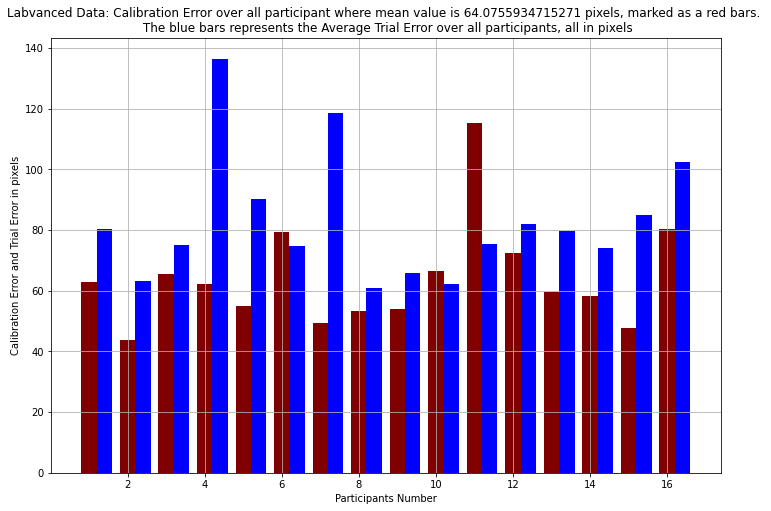

<Figure size 720x504 with 0 Axes>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from random import randint
from scipy import stats
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

counter = 5
# for i in range(1,counter):
#             all_lb = pd.read_csv('../data/lb_data/trial_data/p' + str(i) + '_trials.csv')
all_trials = []
for files in sorted(glob.glob("../data/lb_data/trial_data/*.csv"),key=os.path.getmtime):
    df_temp = pd.read_csv(files, index_col=False)
    all_trials.append(df_temp)

        
#             all_lb = all_lb.reset_index()
lg_calibration = pd.concat(all_trials, axis=0, ignore_index=True)
lg_calibration
lg_calibration = lg_calibration[lg_calibration['Task_Name'] == 'large_grid']
lg_calibration.calibration_error.unique()
lg_calibration = lg_calibration.sort_values('StartFrame',ascending=True)
cal_mean = lg_calibration.calibration_error.mean()
# Calculate reaction time
lg_calibration['reactionTimeCalc'] = abs(lg_calibration.random_target_duration - lg_calibration.reactionTime)

trial_error = lg_calibration.groupby('Rec_Session_Id', as_index=False)['trial_error'].mean()
trial_error

participant_number = list(lg_calibration.Rec_Session_Id.unique())
calib_error = list(lg_calibration.calibration_error.unique())
trial_err = list(trial_error.trial_error.unique())

# set width of bar
barWidth = 0.40
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(participant_number))+ 1
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# creating the bar plot
plt.bar(br1, calib_error, color ='maroon',width = barWidth)
plt.bar(br2, trial_err, color='blue', width = barWidth)

plt.xlabel("Participants Number")
plt.ylabel("Calibration Error and Trial Error in pixels")
plt.title("Labvanced Data: Calibration Error over all participant where mean value is " + str(cal_mean)+ " pixels, marked as a red bars. \n The blue bars represents the Average Trial Error over all participants, all in pixels")
#             plt.savefig('./data_preprocessing/plots_images/calibrations_graphs/labvanced_calVsTrial_error.jpg')
# plt.show()
plt.grid()
data_time = all_lb[['reactionTimeCalc','Rec_Session_Id']]
fig = plt.figure(figsize =(10, 7))